<a href="https://colab.research.google.com/github/bkim9/Resume/blob/main/20_2_Deep_Convolutional_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.3
!pip install -U mxnet-cu112==1.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
import warnings
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [ ]:
d2l.DATA_HUB

{'airfoil': ('http://d2l-data.s3-accelerate.amazonaws.com/airfoil_self_noise.dat',
  '76e5be1548fd8222e5074cf0faae75edff8cf93f'),
 'hotdog': ('http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip',
  'fba480ffa8aa7e0febbb511d181409f899b9baa5'),
 'banana-detection': ('http://d2l-data.s3-accelerate.amazonaws.com/banana-detection.zip',
  '5de26c8fce5ccdea9f91267273464dc968d20d72'),
 'voc2012': ('http://d2l-data.s3-accelerate.amazonaws.com/VOCtrainval_11-May-2012.tar',
  '4e443f8a2eca6b1dac8a6c57641b67dd40621a49'),
 'cifar10_tiny': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_cifar10_tiny.zip',
  '2068874e4b9a9f0fb07ebe0ad2b29754449ccacd'),
 'dog_tiny': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_dog_tiny.zip',
  '0cb91d09b814ecdc07b50f31f8dcad3e81d6a86d'),
 'ptb': ('http://d2l-data.s3-accelerate.amazonaws.com/ptb.zip',
  '319d85e578af0cdc590547f26231e4e31cdf1e42'),
 'glove.6b.50d': ('http://d2l-data.s3-accelerate.amazonaws.com/glove.6B.50d.zip',
  '0b8703943ccdb6eb788e6

In [ ]:
 d2l.DATA_HUB


{'airfoil': ('http://d2l-data.s3-accelerate.amazonaws.com/airfoil_self_noise.dat',
  '76e5be1548fd8222e5074cf0faae75edff8cf93f'),
 'hotdog': ('http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip',
  'fba480ffa8aa7e0febbb511d181409f899b9baa5'),
 'banana-detection': ('http://d2l-data.s3-accelerate.amazonaws.com/banana-detection.zip',
  '5de26c8fce5ccdea9f91267273464dc968d20d72'),
 'voc2012': ('http://d2l-data.s3-accelerate.amazonaws.com/VOCtrainval_11-May-2012.tar',
  '4e443f8a2eca6b1dac8a6c57641b67dd40621a49'),
 'cifar10_tiny': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_cifar10_tiny.zip',
  '2068874e4b9a9f0fb07ebe0ad2b29754449ccacd'),
 'dog_tiny': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_dog_tiny.zip',
  '0cb91d09b814ecdc07b50f31f8dcad3e81d6a86d'),
 'ptb': ('http://d2l-data.s3-accelerate.amazonaws.com/ptb.zip',
  '319d85e578af0cdc590547f26231e4e31cdf1e42'),
 'glove.6b.50d': ('http://d2l-data.s3-accelerate.amazonaws.com/glove.6B.50d.zip',
  '0b8703943ccdb6eb788e6

In [ ]:
data_dir_snli = d2l.download_extract('SNLI')

In [ ]:
data_dir_snli

'../data/snli_1.0'

In [ ]:
d2l.DATA_HUB['pokemon'] = (d2l.DATA_URL + 'pokemon.zip', 'c065c0e2593b8b161a2d7873e42418bf6a21106c')
data_dir = d2l.download_extract('pokemon')
pokemon = torchvision.datasets.ImageFolder(data_dir)

In [ ]:
pokemon


Dataset ImageFolder
    Number of datapoints: 40597
    Root location: ../data/pokemon

In [ ]:
batch_size = 256
transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64,64)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5,0.5)
])
pokemon.transform = transformer
data_iter = torch.utils.data.DataLoader(
    pokemon, batch_size=batch_size,
    shuffle=True, num_workers=d2l.get_dataloader_workers())

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


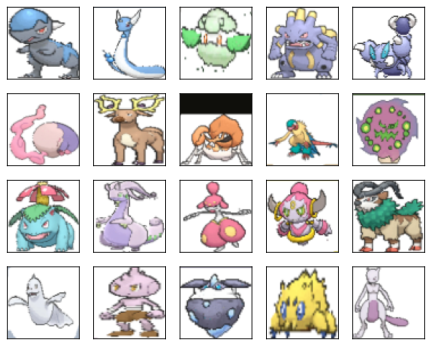

In [ ]:
warnings.filterwarnings('ignore')
d2l.set_figsize((4,4))
for X, y in data_iter:
  imgs = X[:20,:,:,:].permute(0,2,3,1)/2+0.5
  d2l.show_images(imgs, num_rows=4, num_cols=5)
  break

In [ ]:
class G_block(nn.Module):
  def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2, padding=1, **kwargs):
    super(G_block, self).__init__(**kwargs)
    self.conv2d_trans = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, strides, padding, bias=False)
    self.batch_norm = nn.BatchNorm2d(out_channels)
    self.activation = nn.ReLU()
  def forward(self, X):
    return self.activation(self.batch_norm(self.conv2d_trans(X)))

In [ ]:
torch.arange(-2, 1, 0.1)

tensor([-2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
         1.1102e-16,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01])

In [ ]:
x = torch.zeros((2,3,16,16))
g_blk = G_block(20)
g_blk(x).shape

torch.Size([2, 20, 32, 32])

In [ ]:
n_G = 64
net_G = nn.Sequential(
    G_block(in_channels=100, out_channels=n_G*8,
            strides=1, padding=0),
    G_block(in_channels=n_G*8, out_channels=n_G*4),
    G_block(in_channels=n_G*4, out_channels=n_G*2),
    G_block(in_channels=n_G*2, out_channels=n_G),
    nn.ConvTranspose2d(in_channels=n_G, out_channels=3,
                       kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh())

In [ ]:
x = torch.zeros((1,100,1,1))
net_G(x).shape

torch.Size([1, 3, 64, 64])

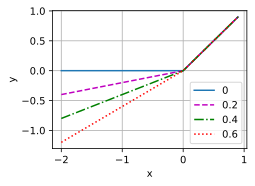

In [ ]:
alphas= [0, .2, .4, .6, .8, 1]
x = torch.arange(-2,1, 0.1)
Y = [nn.LeakyReLU(alpha)(x).detach().numpy() for alpha in alphas]
d2l.plot(x.detach().numpy(), Y, 'x', 'y', alphas)

In [ ]:
class D_block(nn.Module):
  def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2, padding=1, alpha=0.2, **kwargs):
    super(D_block, self).__init__(**kwargs)
    self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding, bias=False)
    self.batch_norm = nn.BatchNorm2d(out_channels)
    self.activation = nn.LeakyReLU(alpha, inplace=True)

  def forward(self, X):
    return self.activation(self.batch_norm(self.conv2d(X)))

In [ ]:
x = torch.zeros((2,3,16,16))
d_blk = D_block(20)
d_blk(x).shape

torch.Size([2, 20, 8, 8])

In [ ]:
n_D = 64
net_D = nn.Sequential(
    D_block(n_D),
    D_block(in_channels=n_D, out_channels=n_D*2),
    D_block(in_channels=n_D*2, out_channels=n_D*4),
    D_block(in_channels=n_D*4, out_channels=n_D*8),
    nn.Conv2d(in_channels=n_D*8, out_channels=1, kernel_size=4, bias=False)
)

In [ ]:
x = torch.zeros((1,3,64,64))
net_D(x).shape

torch.Size([1, 1, 1, 1])

In [ ]:
def train(net_D, net_G, data_iter, num_epochs, lr, latent_dim, device=d2l.try_gpu()):
  loss = nn.BCEWithLogitsLoss(reduction='sum')
  for w in net_D.parameters():
    nn.init.normal_(w, 0,0.02)
  for w in net_G.parameters():
    nn.init.normal_(w,0, 0.02)
  net_D, net_G = net_D.to(device), net_G.to(device)
  trainer_hp = {'lr': lr, 'betas': [0.5,0.999]}
  trainer_D = torch.optim.Adam(net_D.parameters(), **trainer_hp)
  trainer_G = torch.optim.Adam(net_G.parameters(), **trainer_hp)
  animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                          xlim=[1, num_epochs], nrows=2, figsize=(5,5),
                          legend=['discriminator', 'generator'])
  animator.fig.subplots_adjust(hspace=0.3)
  for epoch in range(1, num_epochs + 1):
    timer = d2l.Timer()
    metric = d2l.Accumulator(3)
    for X, _ in data_iter:
      batch_size = X.shape[0]
      Z = torch.normal(0,1, size=(batch_size, latent_dim, 1, 1))
      X, Z = X.to(device), Z.to(device)
      metric.add(d2l.update_D(X, Z, net_D, net_G, loss, trainer_D),
                 d2l.update_G(Z, net_D, net_G, loss, trainer_G),
                 batch_size)
    Z = torch.normal(0,1, size=(21, latent_dim, 1,1), device=device)
    fake_x = net_G(Z).permute(0, 2, 3, 1) / 2 + 0.5
    imgs = torch.cat(
        [torch.cat([
            fake_x[i*7 + j].cpu().detach() for j in range(7)], dim=1)
        for i in range(len(fake_x)//7)], dim=0)
    animator.axes[1].cla()
    animator.axes[1].imshow(imgs)

    loss_D, loss_G = metric[0] / metric[2], metric[1] / metric[2]
    animator.add(epoch, (loss_D, loss_G))
  print(f'loss_D {loss_D:.3f}, loss_G {loss_G: .3f}, '
        f'{metric[2] / timer.stop():.1f} examples/sec on {str(device)}')


loss_D 0.420, loss_G  5.865, 787.7 examples/sec on cuda:0


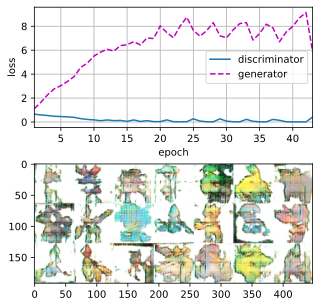

In [ ]:
latent_dim, lr, num_epochs = 100, 0.005, 43
train(net_D, net_G, data_iter, num_epochs, lr, latent_dim)